In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def select_network(network_num, chosen_data):

    data_ret = chosen_data[(chosen_data['PharmNetworkID'] == network_num)]

    groupcols = ['PharmNetworkName', 'SaleMonth']
    data_ret = data_ret.groupby(groupcols)[['Sale20']].sum()
    data_ret = data_ret.reset_index()

    phname = chosen_data[chosen_data['PharmNetworkID'] == network_num]
    phname_ret = phname.iloc[0]['PharmNetworkName']

    label_ret = 'Аптечная сеть: '

    return data_ret, phname_ret, label_ret

In [3]:
def build_graph(data123, label1, name1):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    data123['Sale20'].plot(label=name1)

    plt.xlabel('dates', fontsize=14)
    ax = plt.gca()
    plt.xticks(np.arange(0, len(dates), 1.0))
    ax.set_xticklabels(data123['SaleMonth'], fontsize=12, rotation=30)
    plt.tight_layout()

    plt.ylabel('Продажи')
    plt.xlabel('Месяц')
    plt.title(label1 + name1, fontsize=24)
    plt.savefig(name1 +'.png', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [4]:
def select_region(region_num, dataregions):

    na_reg = dataregions[dataregions['RegionYandexNameL3ID'] == region_num]
    name_reg_ret = na_reg.iloc[0]['RegionYandexNameL3']

    label_reg_ret = 'Регион: '


    data_reg_ret = dataregions[(dataregions['RegionYandexNameL3ID'] == region_num)]

    groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
    data_reg_ret = data_reg_ret.groupby(groupcols2)[['Sale20']].sum()
    data_reg_ret = data_reg_ret.reset_index()
    
    return data_reg_ret, name_reg_ret, label_reg_ret

In [15]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

In [20]:
data_cor = data.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')
#data2.head()

cols = data.columns.tolist()
#print(cols)
cols = cols[-1:] + cols[:-1]
#print(cols)

data_cor['Sale20'] = data['SaleQuantity']*data['ProductID']

columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']
drugstores_region = drugstores[columns_drugstores]

data_cor = data_cor.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')
#target_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']
#data2 = data2[target_columns]

data_cor = data_cor.fillna(0)
data_cor['RegionYandexNameL3ID'] = data_cor['RegionYandexNameL3ID'].astype(int)


dates = sorted(data['SaleMonth'].unique())

######################################################################


data2_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleMonth', 'ProductID', 'Sale20']
data2 = data_cor[data2_columns]

region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
data_region = data_cor[region_columns]

# Построение графика продаж за 2018 год для выбранной Аптечной Сети #

In [22]:
pharmid = 1

######

data_select, name1, label1 = select_network(pharmid, data2)
data_select

,PharmNetworkName,SaleMonth,Sale20
0,Ригла,1,189063
1,Ригла,2,86378
2,Ригла,3,122871
3,Ригла,4,83771
4,Ригла,5,46631
5,Ригла,6,35303
6,Ригла,7,29725
7,Ригла,8,52508
8,Ригла,9,107606
9,Ригла,10,84903


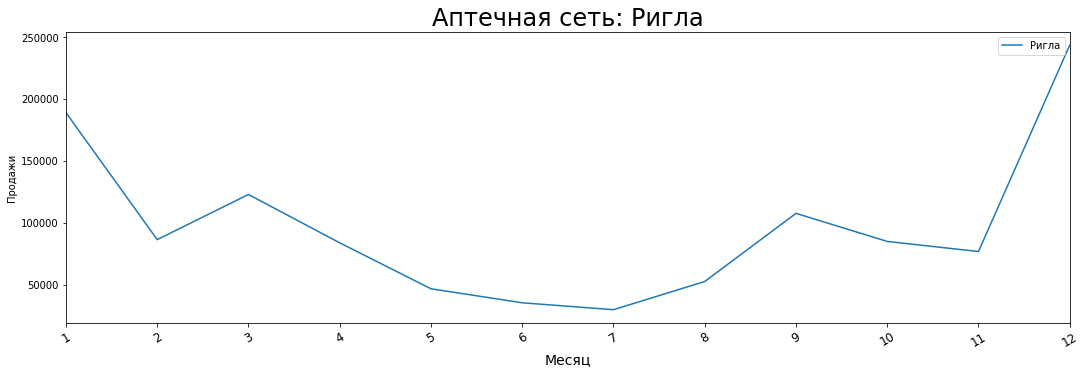

In [23]:
build_graph(data_select, label1, name1)

# Построение графика для 1-го региона #

In [24]:
number_region = 77

#########################

data_reg_in, name_reg_in, label_reg_in = select_region(number_region, data_region)
data_reg_in

,RegionYandexNameL3ID,RegionYandexNameL3,SaleMonth,Sale20
0,77,Москва,1,114876
1,77,Москва,2,142310
2,77,Москва,3,180244
3,77,Москва,4,118993
4,77,Москва,5,74518
5,77,Москва,6,65115
6,77,Москва,7,88317
7,77,Москва,8,111264
8,77,Москва,9,292162
9,77,Москва,10,186826


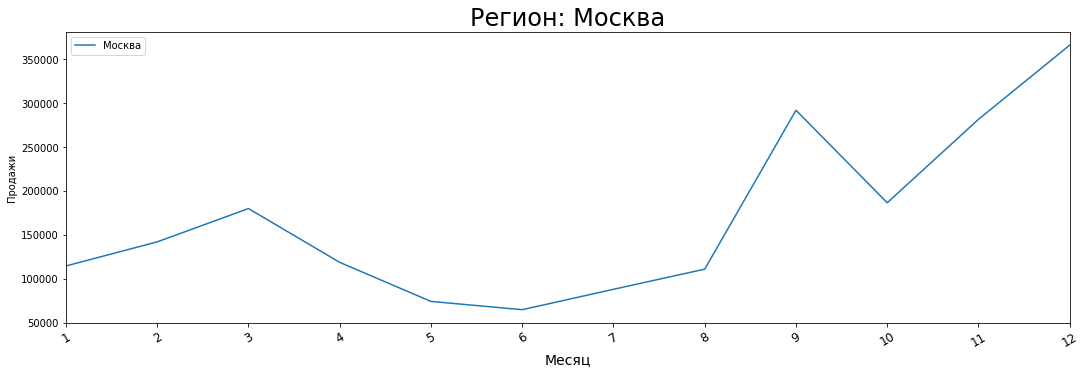

In [25]:
build_graph(data_reg_in, label_reg_in, name_reg_in)

# Построение графиков продаж для НЕСКОЛЬКИХ Аптечных Сетей #

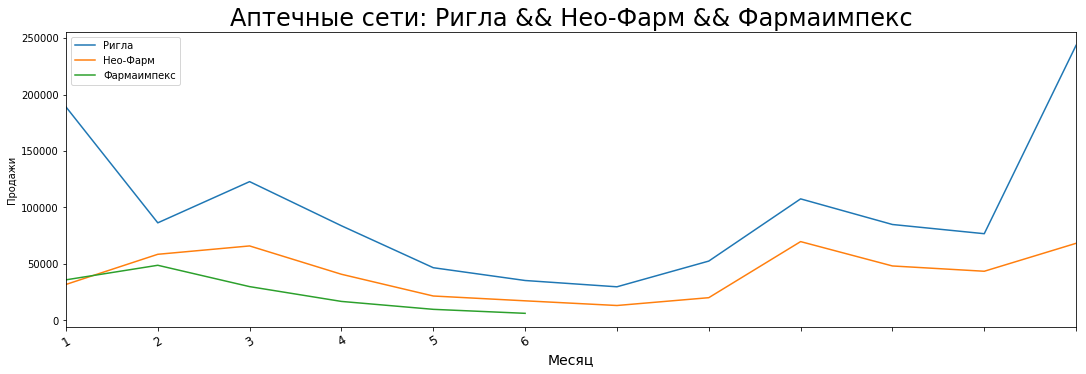

In [26]:
several_n = [1, 3, 4]

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in several_n:
    qdata, qname, qlabel = select_network(i, data2)
    qdata['Sale20'].plot(label=qname)
    qnames.append(qname)
    
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + string_qname, fontsize=24)
plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Построение графика для НЕСКОЛЬКИХ регионов #

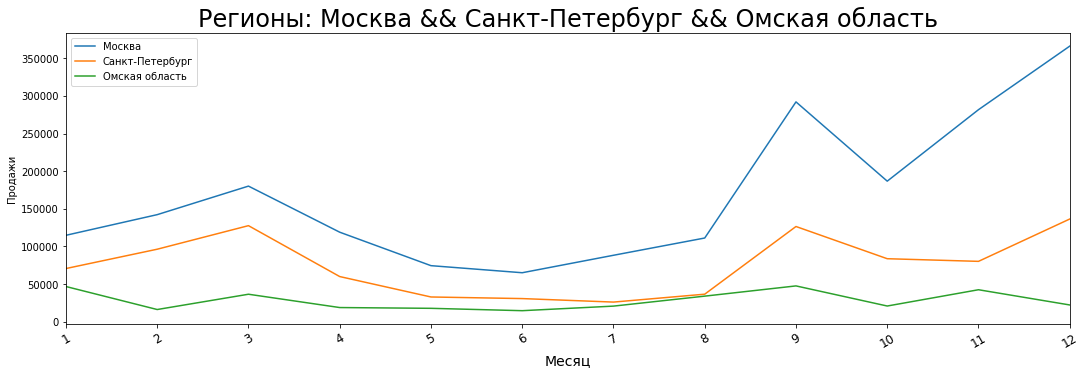

In [27]:
several_regions = [77, 78, 55]

#####################
qnames_r = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for j in several_regions:
    qdata_r, qname_r, qlabel_r = select_region(j, data_region)
    qdata_r['Sale20'].plot(label=qname_r)
    qnames_r.append(qname_r)
    
re_label_r = 'Регионы: '
re_label_r2 = 'Регионы '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata_r['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname_r = ' && '.join(qnames_r)
    
plt.title(re_label_r + string_qname_r, fontsize=24)
plt.savefig(re_label_r2 + string_qname_r +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Просмотр аптечных сетей #

In [28]:
network_cols = ['PharmNetworkName', 'PharmNetworkID']
network_id = data2[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

pd.options.display.max_rows = 150

#network_id

In [29]:
regions_cols = ['RegionYandexNameL3', 'RegionYandexNameL3ID']
regions_id = data_region2[regions_cols]
regions_id = regions_id.drop_duplicates()
regions_id = regions_id.sort_values(by=['RegionYandexNameL3ID'])
regions_id = regions_id.reset_index()
regions_id = regions_id[regions_cols]

#regions_id

NameError: name 'data_region2' is not defined